In [391]:
import warnings
warnings.filterwarnings('ignore')

In [392]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression

from sklearn.feature_selection import RFE

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [393]:
data = pd.read_csv('CarPrice.csv')
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [394]:
data.shape

(205, 26)

In [395]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

No missing value

In [396]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
car_ID,205.0,103.000000,59.322565,1.00,52.00,103.00,154.00,205.00
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
wheelbase,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
carlength,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
carwidth,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
carheight,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curbweight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
enginesize,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
boreratio,205.0,3.329756,0.270844,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.255415,0.313597,2.07,3.11,3.29,3.41,4.17


In [397]:
data.duplicated(subset = ['car_ID']).sum()

0

No duplicates

In [398]:
data.describe(include=['O'])

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
count,205,205,205,205,205,205,205,205,205,205
unique,147,2,2,2,5,3,2,7,7,8
top,toyota corona,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,6,185,168,115,96,120,202,148,159,94


In [399]:
columns = data.columns
for col in columns:
    print(col, ':\n', data[col].unique())
    print(data[col].value_counts().nlargest(5))
    print('\n',20*'**','\n')

car_ID :
 [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205]
1      1
142    1
132    1
133    1
134    1
Name: car_ID, dtype: int64

 **************************************** 

symboling :
 [ 3  1  2  0 -1 -2]
 0    6

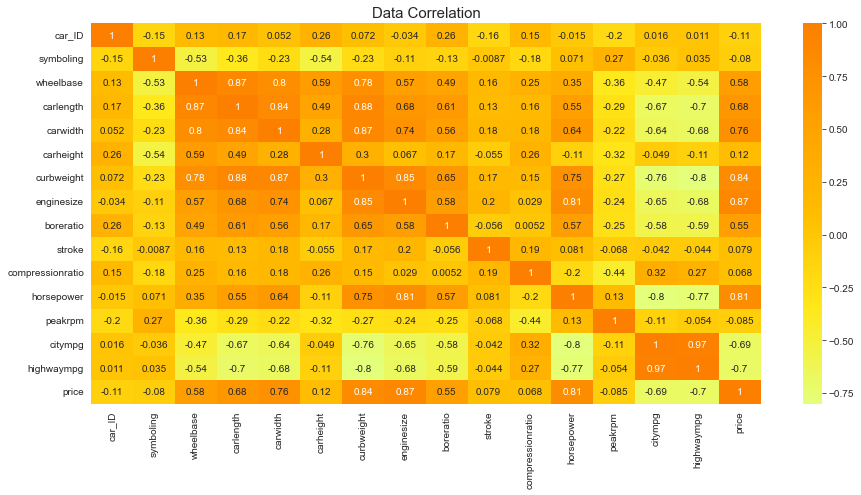

In [400]:
plt.figure(figsize=(15,7))
sns.heatmap(data.corr(),annot=True, cmap="Wistia")
plt.title("Data Correlation", size = 15)
plt.show()

In [401]:
data.columns = data.columns.str.lower().str.replace(' ','_')

In [402]:
data.columns

Index(['car_id', 'symboling', 'carname', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [403]:
data['carname'].value_counts()

toyota corona           6
toyota corolla          6
peugeot 504             6
subaru dl               4
mitsubishi mirage g4    3
                       ..
mazda glc 4             1
mazda rx2 coupe         1
maxda glc deluxe        1
maxda rx3               1
volvo 246               1
Name: carname, Length: 147, dtype: int64

<AxesSubplot:xlabel='price', ylabel='Density'>

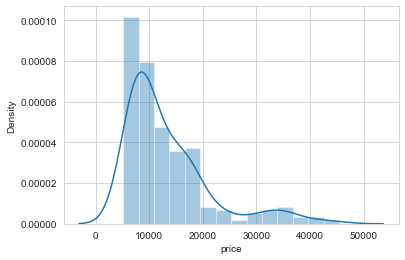

In [404]:
sns.distplot(data['price'])

In [405]:
(data['price']).describe()

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

In [406]:
data["carname"].str.split(" ")

0            [alfa-romero, giulia]
1           [alfa-romero, stelvio]
2      [alfa-romero, Quadrifoglio]
3                  [audi, 100, ls]
4                    [audi, 100ls]
                  ...             
200            [volvo, 145e, (sw)]
201                 [volvo, 144ea]
202                 [volvo, 244dl]
203                   [volvo, 246]
204                 [volvo, 264gl]
Name: carname, Length: 205, dtype: object

In [407]:
data["carname"] = data["carname"].str.split(" ",expand=True)[0]
print(data["carname"].unique())
print(data["carname"].value_counts())

['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'maxda' 'mazda' 'buick' 'mercury' 'mitsubishi' 'Nissan' 'nissan'
 'peugeot' 'plymouth' 'porsche' 'porcshce' 'renault' 'saab' 'subaru'
 'toyota' 'toyouta' 'vokswagen' 'volkswagen' 'vw' 'volvo']
toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
volkswagen      9
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
isuzu           4
porsche         4
alfa-romero     3
chevrolet       3
jaguar          3
vw              2
maxda           2
renault         2
toyouta         1
vokswagen       1
Nissan          1
mercury         1
porcshce        1
Name: carname, dtype: int64


In [408]:
data['carname'] = data['carname'].replace({'maxda': 'mazda',
                                         'porcshce': 'porsche',
                                         'toyouta': 'toyota',
                                         'vokswagen': 'volkswagen',
                                         'vw': 'volkswagen',
                                         'Nissan': 'nissan' })

<bound method IndexOpsMixin.value_counts of 0         gas
1         gas
2         gas
3         gas
4         gas
        ...  
200       gas
201       gas
202       gas
203    diesel
204       gas
Name: fueltype, Length: 205, dtype: object>


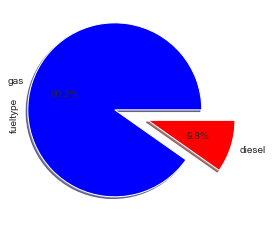

In [409]:
data['fueltype'].value_counts().plot(kind='pie',explode=[0.2,0.2],autopct='%1.1f%%', shadow=True, colors=['b','r'])
print(data['fueltype'].value_counts)

<AxesSubplot:xlabel='fueltype', ylabel='price'>

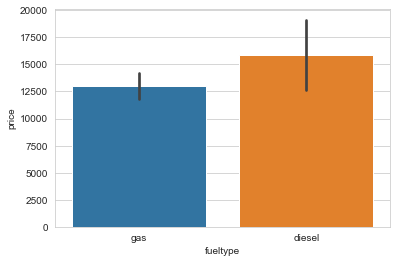

In [410]:
sns.barplot(x="fueltype", y="price", data=data)

<AxesSubplot:xlabel='fueltype', ylabel='price'>

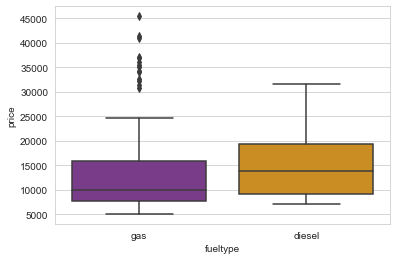

In [411]:
sns.boxplot(x='fueltype', y='price', data=data, palette='CMRmap')

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64


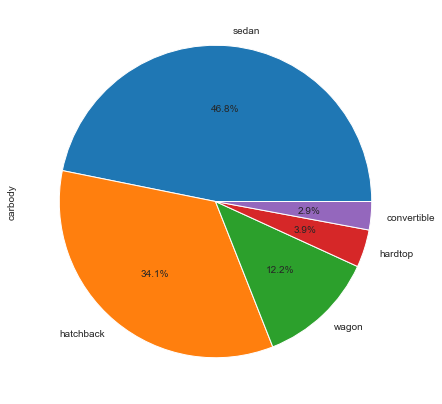

In [412]:
plt.figure(figsize=(7,10))
data['carbody'].value_counts().plot(kind='pie',autopct='%1.1f%%')
print(data['carbody'].value_counts())

<AxesSubplot:xlabel='carbody', ylabel='price'>

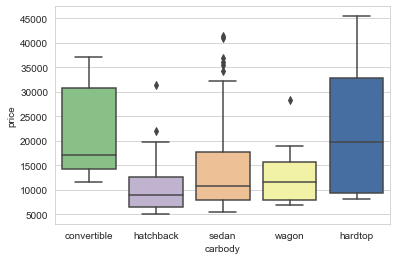

In [413]:
sns.boxplot(x = 'carbody', y='price', data=data, palette='Accent')

<AxesSubplot:xlabel='aspiration', ylabel='count'>

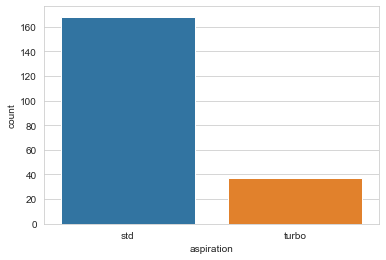

In [414]:
sns.countplot(data['aspiration'])

<AxesSubplot:xlabel='aspiration', ylabel='price'>

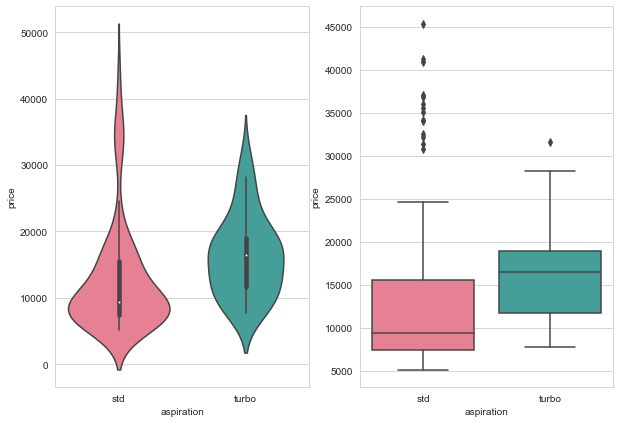

In [415]:
plt.figure(figsize=(10,7))
plt.subplot(121)
sns.violinplot(x = 'aspiration', y = 'price', data =data,palette='husl')
plt.subplot(122)
sns.boxplot(x = 'aspiration', y = 'price', data = data,palette='husl')

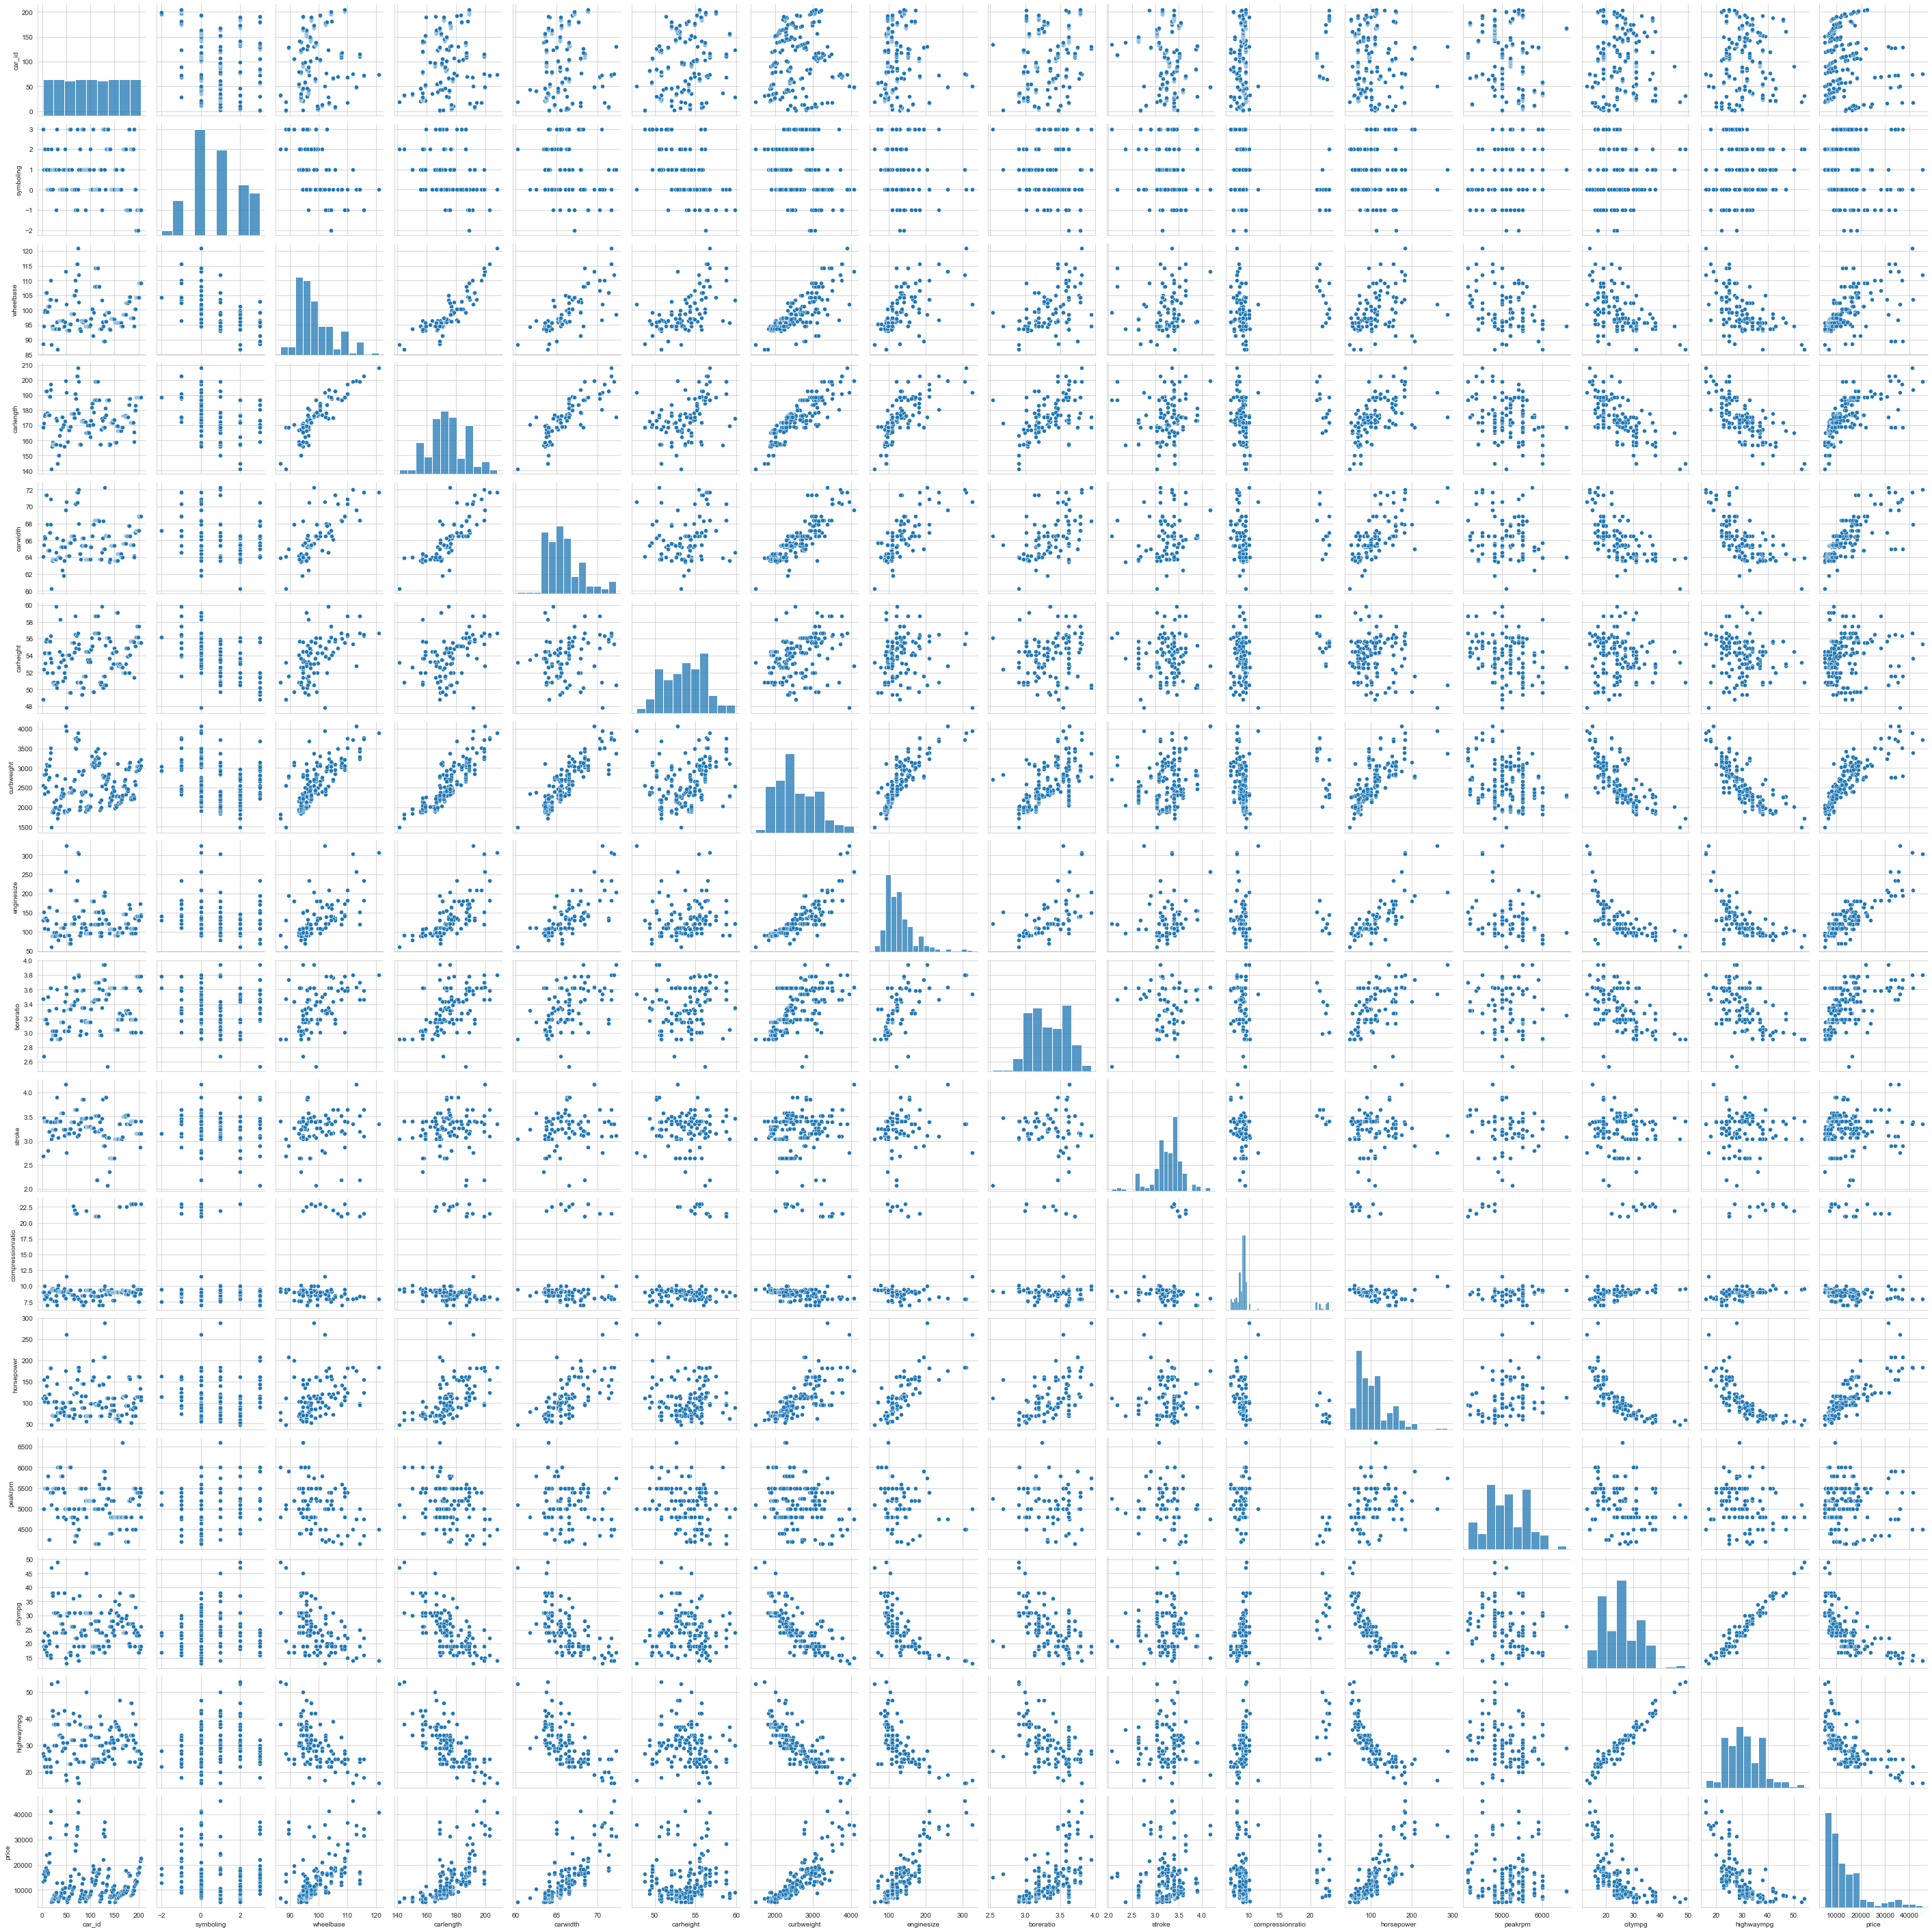

In [416]:
num_data = data.select_dtypes(include = np.number)
sns.pairplot(num_data)

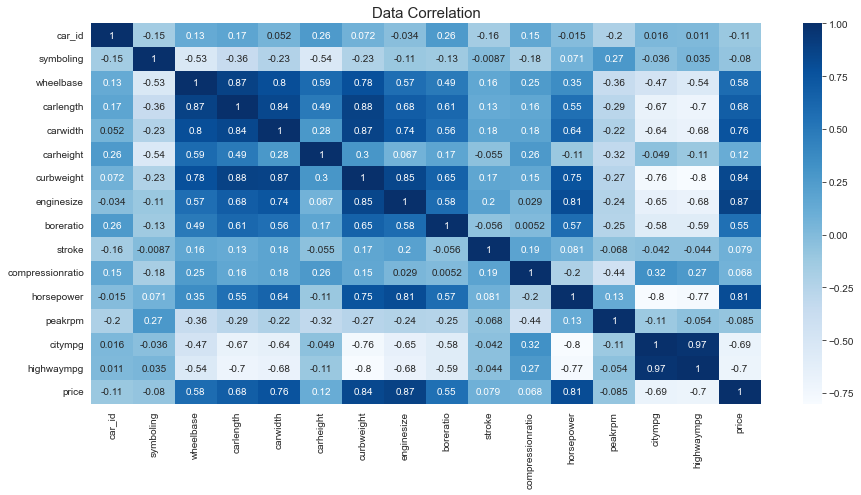

In [417]:
plt.figure(figsize=(15,7))
sns.heatmap(data.corr(),annot=True,cmap="Blues")
plt.title("Data Correlation",size=15)
plt.show()

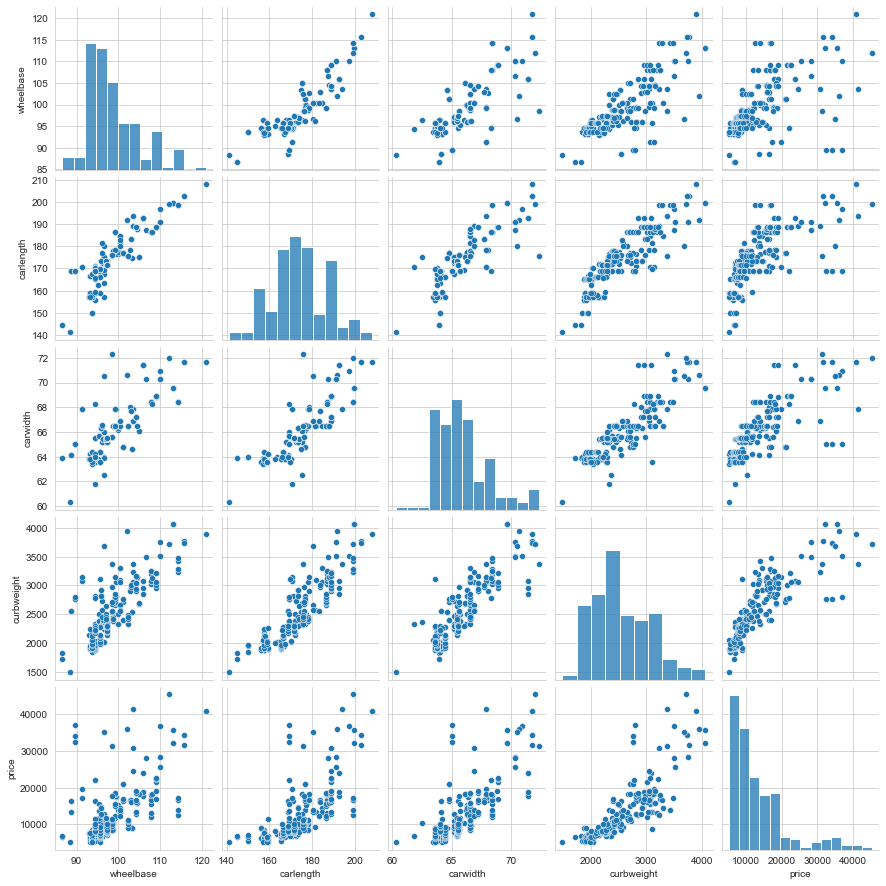

In [418]:
col1=['wheelbase','carlength','carwidth','curbweight','price']
sns.pairplot(data[col1])

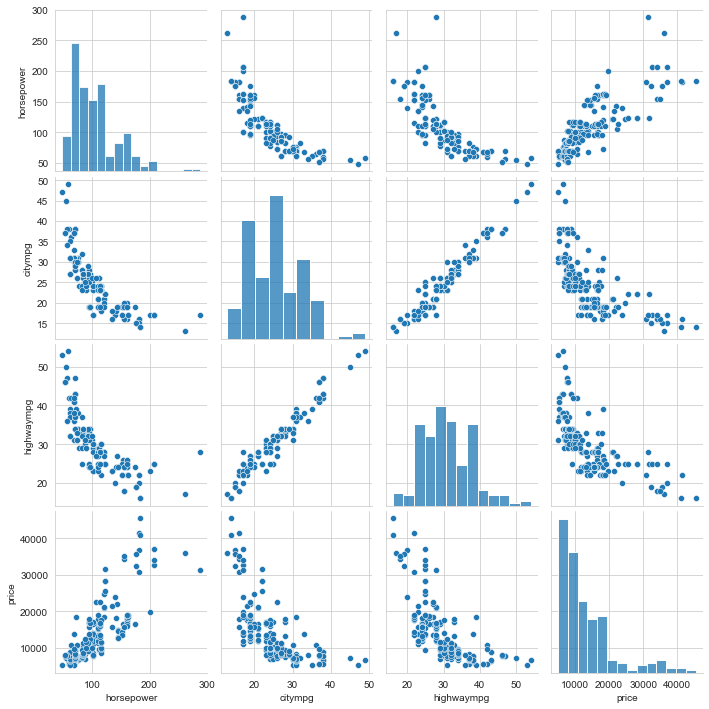

In [419]:
col2=['horsepower','citympg','highwaympg','price']
sns.pairplot(data[col2])

In [420]:
col_obj = data.select_dtypes(include=["object"])
col_obj

,carname,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi
...,...,...,...,...,...,...,...,...,...,...
200,volvo,gas,std,four,sedan,rwd,front,ohc,four,mpfi
201,volvo,gas,turbo,four,sedan,rwd,front,ohc,four,mpfi
202,volvo,gas,std,four,sedan,rwd,front,ohcv,six,mpfi
203,volvo,diesel,turbo,four,sedan,rwd,front,ohc,six,idi


In [421]:
car = data.copy()

In [422]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for i in col_obj:
    car[i] = le.fit_transform(car[i])

In [423]:
car.head()

,car_id,symboling,carname,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,0,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,0,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,0,1,0,1,2,2,0,94.5,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,1,1,0,0,3,1,0,99.8,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,1,1,0,0,3,0,0,99.4,...,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0


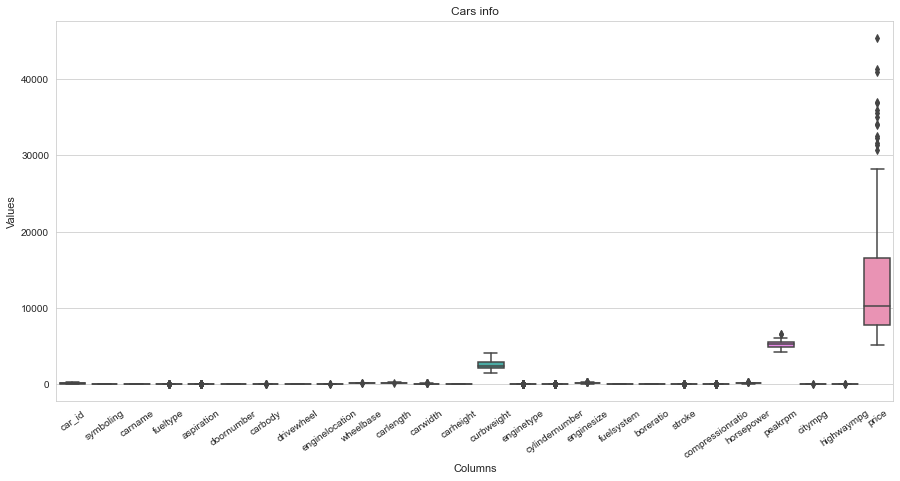

In [424]:
plt.figure(figsize=(15,7))
chart=sns.boxplot(data=car)
chart.set_xticklabels(chart.get_xticklabels(),rotation=35)
plt.title("Cars info")
plt.ylabel("Values",size=11)
plt.xlabel("Columns",size=11);

In [425]:
outlier=car["price"]
Q1=outlier.quantile(0.25)
Q3=outlier.quantile(0.75)
IQR=Q3-Q1
underoutliers=Q1-1.5*IQR
upperoutliers=Q3+1.5*IQR
under_border=(outlier<underoutliers)
upper_border=(outlier>upperoutliers)

In [426]:
under_border.value_counts()

False    205
Name: price, dtype: int64

In [427]:
upper_border.value_counts()

False    190
True      15
Name: price, dtype: int64

In [428]:
CAR_withoutoutliers = car.drop(car[car['price']>upperoutliers].index, axis = 0)

In [429]:
CAR_withoutoutliers.describe()

,car_id,symboling,carname,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.0,190.000000,...,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000
mean,105.463158,0.836842,12.610526,0.900000,0.189474,0.431579,2.652632,1.273684,0.0,98.276316,...,118.415789,3.126316,3.303579,3.251263,10.183789,97.231579,5124.473684,25.947368,31.521053,11509.400879
std,59.925052,1.230009,6.176924,0.300793,0.392920,0.496605,0.819968,0.543204,0.0,5.280965,...,26.854315,2.032759,0.261671,0.304045,4.015859,30.225940,471.593591,6.212921,6.476419,4968.444389
min,1.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,86.600000,...,61.000000,0.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,16.000000,20.000000,5118.000000
25%,54.250000,0.000000,9.000000,1.000000,0.000000,0.000000,2.000000,1.000000,0.0,94.500000,...,97.000000,1.000000,3.130000,3.127500,8.700000,70.000000,4800.000000,21.000000,26.000000,7701.250000
50%,106.500000,1.000000,12.000000,1.000000,0.000000,0.000000,3.000000,1.000000,0.0,96.500000,...,110.000000,3.000000,3.270000,3.290000,9.000000,92.000000,5200.000000,25.000000,31.000000,9959.500000
75%,157.750000,2.000000,19.000000,1.000000,0.000000,1.000000,3.000000,2.000000,0.0,100.400000,...,136.000000,5.000000,3.540000,3.410000,9.400000,114.000000,5500.000000,31.000000,37.000000,15197.500000
max,205.000000,3.000000,21.000000,1.000000,1.000000,1.000000,4.000000,2.000000,0.0,114.200000,...,183.000000,7.000000,3.940000,3.900000,23.000000,200.000000,6600.000000,49.000000,54.000000,28248.000000


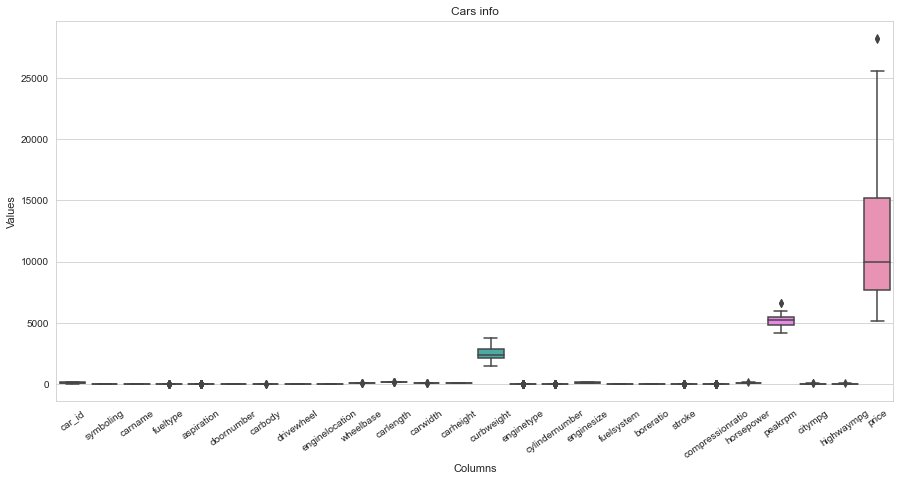

In [430]:
plt.figure(figsize=(15,7))
chart=sns.boxplot(data=CAR_withoutoutliers)
chart.set_xticklabels(chart.get_xticklabels(),rotation=35)
plt.title("Cars info")
plt.ylabel("Values",size=11)
plt.xlabel("Columns",size=11);

In [431]:
del car['fueltype']
del car['enginelocation']

In [432]:
firstQ_tb = car['horsepower'].quantile(0.25)
thirdQ_tb = car['horsepower'].quantile(0.75)
IQR_tb = thirdQ_tb - firstQ_tb
IQR_tb

46.0

In [433]:
newB_tb = thirdQ_tb + 3*(IQR_tb)
newB_tb

254.0

In [434]:
car[car['horsepower']>newB_tb].value_counts()

car_id  symboling  carname  aspiration  doornumber  carbody  drivewheel  wheelbase  carlength  carwidth  carheight  curbweight  enginetype  cylindernumber  enginesize  fuelsystem  boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  highwaympg  price  
50      0          8        0           1           3        2           102.0      191.7      70.6      47.8       3950        5           5               326         5           3.54       2.76    11.5              262         5000     13       17          36000.0    1
130     1          15       0           1           2        2           98.4       175.7      72.3      50.5       3366        1           0               203         5           3.94       3.11    10.0              288         5750     17       28          31400.5    1
dtype: int64

In [435]:
car.drop(car[car['horsepower']>newB_tb].index, axis = 0, inplace =True)
car.shape

(203, 24)

<AxesSubplot:xlabel='compressionratio'>

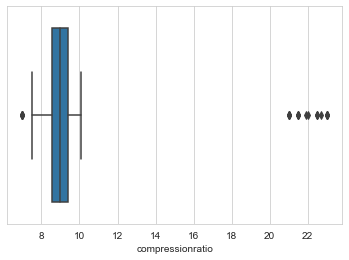

In [436]:
sns.boxplot(car['compressionratio'])

In [437]:
firstQ_tb = car['compressionratio'].quantile(0.25)
thirdQ_tb = car['compressionratio'].quantile(0.75)
IQR_tb = thirdQ_tb - firstQ_tb
IQR_tb

0.8499999999999996

In [438]:
newB_tb = thirdQ_tb + 3*(IQR_tb)
newB_tb

11.95

In [439]:
car[car['compressionratio']>newB_tb].value_counts()

car_id  symboling  carname  aspiration  doornumber  carbody  drivewheel  wheelbase  carlength  carwidth  carheight  curbweight  enginetype  cylindernumber  enginesize  fuelsystem  boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  highwaympg  price  
64       0         9        0           0           3        1           98.8       177.8      66.5      55.5       2443        3           2               122         3           3.39       3.39    22.7              64          4650     36       42          10795.0    1
67       0         9        0           0           3        2           104.9      175.0      66.1      54.4       2700        3           2               134         3           3.43       3.64    22.0              72          4200     31       39          18344.0    1
193      0         20       1           0           3        1           100.4      180.2      66.9      55.1       2579        3           2               97          3           3.01     

In [440]:
car.drop(car[car['compressionratio']>newB_tb].index, axis = 0, inplace =True)
car.shape

(183, 24)

<AxesSubplot:xlabel='enginesize'>

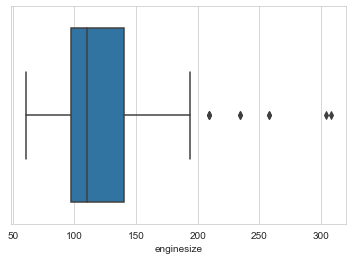

In [441]:
sns.boxplot(car['enginesize'])

In [442]:
firstQ_tb = car['enginesize'].quantile(0.25)
thirdQ_tb = car['enginesize'].quantile(0.75)
IQR_tb = thirdQ_tb - firstQ_tb
IQR_tb

43.5

In [443]:
newB_tb = thirdQ_tb + 3*(IQR_tb)
newB_tb
car[car['enginesize']>newB_tb].value_counts()
car.drop(car[car['enginesize']>newB_tb].index, axis = 0, inplace =True)
car.shape

(181, 24)

In [444]:
car.drop(car[car['enginesize']>newB_tb].index, axis = 0, inplace =True)
car.shape

(181, 24)

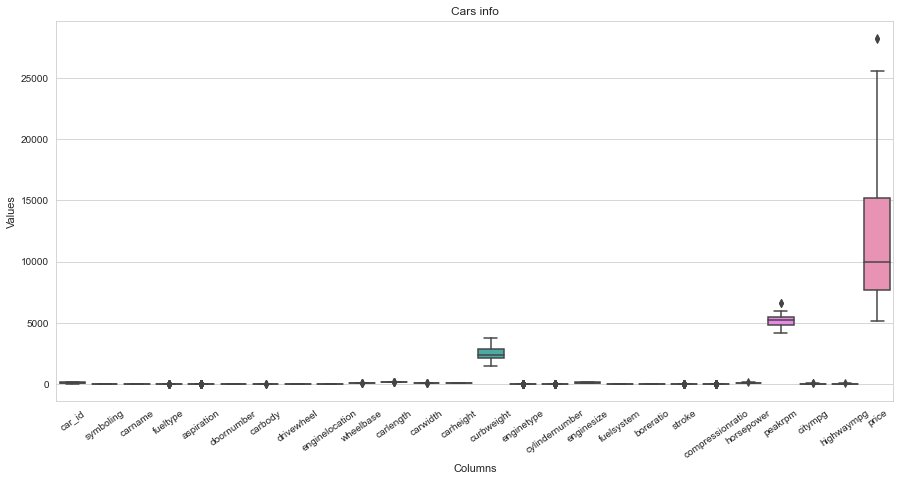

In [445]:
plt.figure(figsize=(15,7))
chart=sns.boxplot(data=CAR_withoutoutliers)
chart.set_xticklabels(chart.get_xticklabels(),rotation=35)
plt.title("Cars info")
plt.ylabel("Values",size=11)
plt.xlabel("Columns",size=11);

In [446]:
from sklearn.preprocessing import RobustScaler
scalar = RobustScaler()

In [447]:
X = scalar.fit_transform(X)

In [448]:
X = car.drop(['price'] , axis = 1).values
y= car['price' ].values

In [449]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [450]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)


LinearRegression()

In [451]:
lr.score(X_train, y_train)

0.8846062195049555

In [452]:
lr.score(X_test, y_test)

0.785763791069591

In [453]:
y_pred =lr.predict(X_test)
df = pd.DataFrame({"Y_test": y_test , "Y_pred1" : y_pred})
df.head(10)

,Y_test,Y_pred1
0,6295.0,8026.917653
1,10345.0,8810.797110
2,11549.0,12920.141008
3,9279.0,11385.905574
4,8058.0,4049.215174
5,30760.0,29171.818759
6,6229.0,8208.011569
7,6189.0,6227.708418
8,37028.0,27990.843186
9,15040.0,16233.074600


In [454]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
r2_score(y_test, y_pred), mean_absolute_error(y_test, y_pred), np.sqrt(mean_squared_error(y_test, y_pred))

(0.785763791069591, 2465.665465720884, 3700.8512153811357)

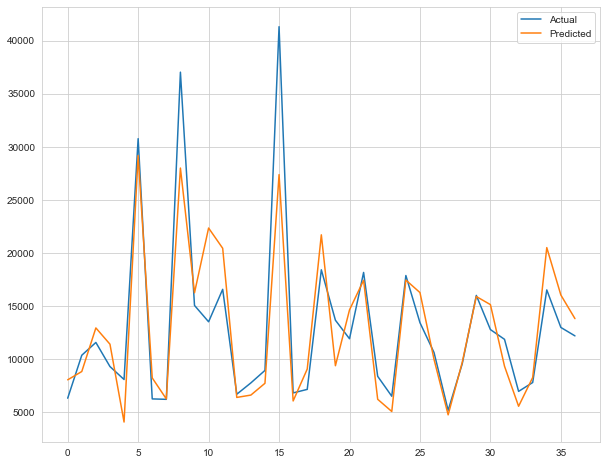

In [455]:
plt.figure(figsize=(10,8))
plt.plot(df[:50])
plt.legend(["Actual" , "Predicted"])

In [456]:
from sklearn.linear_model import Lasso

In [457]:
las = Lasso(alpha=0.9)
las.fit(X_train, y_train)
y_predict = lr.predict(X_test)

In [458]:
r2_score(y_test, y_predict), mean_absolute_error(y_test, y_predict), np.sqrt(mean_squared_error(y_test, y_predict))

(0.785763791069591, 2465.665465720884, 3700.8512153811357)

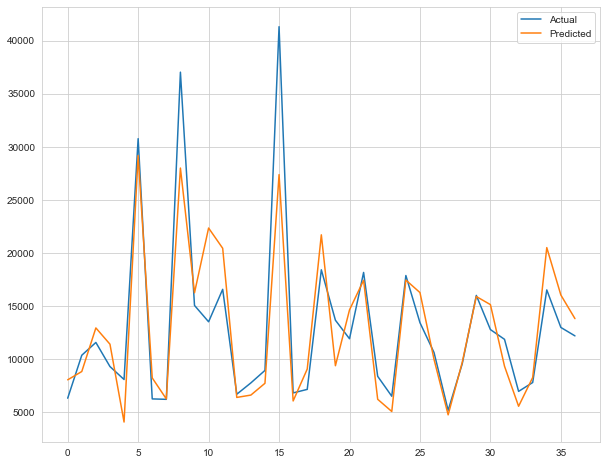

In [459]:
plt.figure(figsize=(10,8))
plt.plot(df[:50])
plt.legend(["Actual" , "Predicted"])

In [460]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xg
from sklearn.tree import DecisionTreeRegressor
import lightgbm as lgbm

In [461]:
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
yhat = dt.predict(X_test)
r2_score(y_test, yhat), mean_absolute_error(y_test, yhat), np.sqrt(mean_squared_error(y_test, yhat))

(0.9443054976339347, 1301.599108108108, 1886.9541699979563)

In [462]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=3)
from sklearn.model_selection import StratifiedKFold
folds=StratifiedKFold(n_splits=3)

In [463]:
def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

In [464]:
scores_log = []
scores_rf = []
scores_xgb = []
scores_dec =[]
scores_gra = []
scores_lgbm = []

In [465]:
for train_index, test_index in kf.split(X, y):
    X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
    scores_log.append(get_score(LinearRegression(),X_train, X_test, y_train, y_test ))
    scores_rf.append(get_score(RandomForestRegressor(),X_train, X_test, y_train, y_test ))
    scores_gra.append(get_score(GradientBoostingRegressor(),X_train, X_test, y_train, y_test ))
    scores_dec.append(get_score(DecisionTreeRegressor(),X_train, X_test, y_train, y_test ))
    scores_xgb.append(get_score(lgbm.LGBMRegressor(),X_train, X_test, y_train, y_test ))
    scores_lgbm.append(get_score(xg.XGBRegressor(),X_train, X_test, y_train, y_test ))

In [466]:
print("Linear Regression Scores:\n", scores_log)
print("Random Forest Scores:\n", scores_rf)
print("XG Boost Scores:\n", scores_xgb)
print("GradientBoosting Regressor Scores:\n", scores_gra)
print("LightGBM Regressor Scores:\n", scores_lgbm)
print("Decision Tree Regressor Scores:\n", scores_dec)

Linear Regression Scores:
 [0.5252391847822862, 0.6788390078402873, -0.46000346612895004]
Random Forest Scores:
 [0.8472979306841792, 0.7357211835279056, 0.7761619900191186]
XG Boost Scores:
 [0.6008615441918821, 0.5001665553242293, 0.4752868890196331]
GradientBoosting Regressor Scores:
 [0.8682654131606331, 0.7272713688690036, 0.6553387556526596]
LightGBM Regressor Scores:
 [0.8083821939913891, 0.3374197829701897, 0.7684698748347325]
Decision Tree Regressor Scores:
 [0.8129857176452099, 0.2826792861076388, -0.025850285022730013]


In [473]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [100, 80, 60, 55, 51, 45],
              'max_depth': [7, 8],
              'reg_lambda' :[0.26, 0.25, 0.2]
              }

grid = GridSearchCV(xg.XGBRFRegressor(), param_grid, refit = True, verbose = 3, n_jobs=-1)

In [474]:

# fitting the model for grid search
grid_result=grid.fit(X_train, y_train)
best_params=grid_result.best_params_
best_score=grid_result.best_score_
print(best_params)
print(best_score)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
{'max_depth': 7, 'n_estimators': 100, 'reg_lambda': 0.26}
-0.1777071789759756


In [475]:
from sklearn.preprocessing import QuantileTransformer
from sklearn.compose import TransformedTargetRegressor

#using best params to create and fit model
best_model = xg.XGBRFRegressor(max_depth=best_params["max_depth"], n_estimators=best_params["n_estimators"], reg_lambda=best_params["reg_lambda"])
regr_trans = TransformedTargetRegressor(regressor=best_model, transformer=QuantileTransformer(output_distribution='normal'))
regr_trans.fit(X_train, y_train)
yhat = regr_trans.predict(X_test)

#evaluate metrics
r2_score(y_test, yhat), mean_absolute_error(y_test, yhat), np.sqrt(mean_squared_error(y_test, yhat))

(0.7717941172592186, 1449.485888671875, 2015.8960855856326)

In [478]:
parameters = {'learning_rate': [0.01,0.02,0.03,0.04],
              'subsample'    : [0.9, 0.5, 0.2, 0.1],
              'n_estimators' : [100,500,1000, 1500],
              'max_depth'    : [4,6,8,10]
              }
grid = GridSearchCV(estimator=GradientBoostingRegressor, param_grid = parameters , cv = 2, n_jobs=-1)

TypeError: Cannot clone object. You should provide an instance of scikit-learn estimator instead of a class.

In [479]:
grid_result = grid.fit(X_train, y_train)

TypeError: Cannot clone object. You should provide an instance of scikit-learn estimator instead of a class.

In [471]:
grid_s.best_score_

AttributeError: 'GridSearchCV' object has no attribute 'best_score_'